In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_lables), (test_data, test_lables) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = train_lables.astype('float32')
y_test = test_lables.astype('float32')

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss = 'binary_crossentropy', 
             metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,partial_y_train,
                   epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 209s 14ms/step - loss: 0.5331 - acc: 0.7977 - val_loss: 0.4196 - val_acc: 0.8564
Epoch 2/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.3290 - acc: 0.9015 - val_loss: 0.3206 - val_acc: 0.8841
Epoch 3/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.2400 - acc: 0.9269 - val_loss: 0.2942 - val_acc: 0.8857
Epoch 4/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.1919 - acc: 0.9388 - val_loss: 0.2748 - val_acc: 0.8912
Epoch 5/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.1579 - acc: 0.9505 - val_loss: 0.2739 - val_acc: 0.8888
Epoch 6/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.1320 - acc: 0.9597 - val_loss: 0.2819 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.1125 - acc: 0.9662 - val_loss: 0.2960 -

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

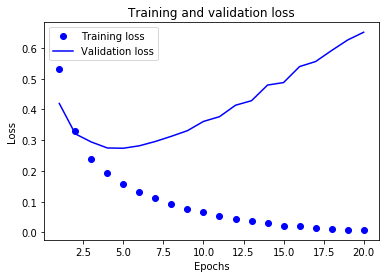

In [8]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

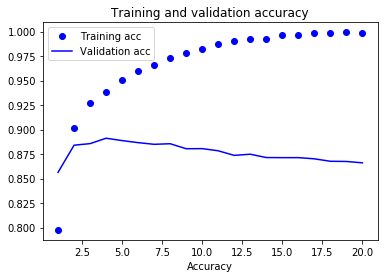

In [10]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()

plt.show()